(1797,)
Classification report for classifier DecisionTreeClassifier(random_state=32):
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        88
           1       0.72      0.57      0.64        91
           2       0.88      0.74      0.81        86
           3       0.73      0.74      0.73        91
           4       0.82      0.87      0.84        92
           5       0.62      0.73      0.67        91
           6       0.89      0.93      0.91        91
           7       0.88      0.79      0.83        89
           8       0.68      0.72      0.70        88
           9       0.64      0.73      0.68        92

    accuracy                           0.77       899
   macro avg       0.78      0.77      0.78       899
weighted avg       0.78      0.77      0.77       899


Classification report for classifier DecisionTreeClassifier(random_state=32):
              precision    recall  f1-score   support

           0       0.

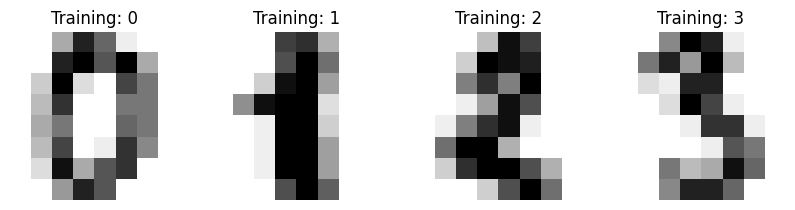

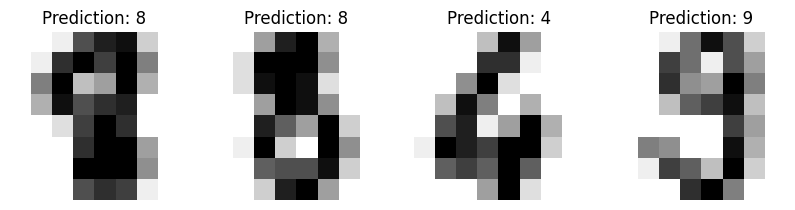

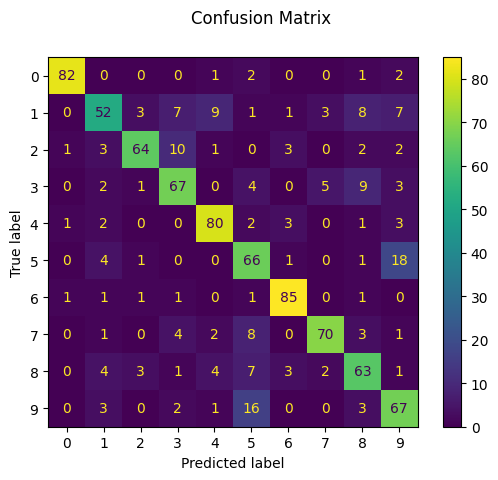

In [1]:
#준비과정
import sklearn

import matplotlib.pyplot as plt

#데이터셋, 분류모델등 불러옴
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# svm 분류모델을 로드
# 사이킷런에서는 다양한 분류모델을 코드 몇줄로 쉽게 적용가능
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()

#이미지가 64개의 픽셀, 8x8의 픽셀로 구성
digits_data = digits.data
digits_data.shape
digits_data[0]

digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:20]

#트레인샘플 시각화
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

#이미지컬러를 평탄화하여 분류classification에 적용
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# svm분류모델 사용시 아래주석을 의사결정나무 코드와 교체, gamma값으로 구분 (gamma : 곡률 경계에 대한 파라미터 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값)
#clf = svm.SVC(gamma=0.001)

#####의사결정나무 분류모델 사용시
decision_tree = DecisionTreeClassifier(random_state=32)

# train데이터와 text데이터를 5:5로 분리하는 코드
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

#훈련데이터에서 학습 : svm사용시 아래주석과 의사결정나무 코드와 교체
#clf.fit(X_train, y_train)

#####의사결정나무 사용시
decision_tree.fit(X_train, y_train)

#실행(예측) : svm사용시 아래주석과 의사결정나무 코드와 교체
#predicted = clf.predict(X_test)

##### 의사결정나무 사용시
predicted = decision_tree.predict(X_test)


#이하 테스트샘플 시각화 과정
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

    print(
    f"Classification report for classifier {decision_tree}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

#성능평가지표 Confusion metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

svm, 의사결정나무 두가지 분류모델로 결과를 도출하였는데,
컨퓨전 매트릭스 상으로 SVM모델이 큰 차이로 더 정확하다. 이유는 아직 잘 모르겠다..














느낀점 :

#첫 익스플로레이션 노드를 접하고 처음 들었던 느낌은 "자 걷는 법을 배웠으니 나와 축구를 해보자!" 같은 느낌이었고 퍼실님과 느낌을 공유하였다.
직접 해보니 축구정도가 아니라 세팍타크로를 하는 것 같았다. 다행히 구글링과 인터넷 서치는 할줄 알아서 다행히 남들것을 베껴보고 공부할수는 있었다.
그리고 직접 코드를 적어보고 남들것을 베껴보고 하는게 사실 크게 배우고 많이 도움이 되는것 같다.
LMS평가 상세기준에는 미달일것 같지만 좌절하지않고 끈기를 가져야겠다.

#사실 LMS읽을때 성경책을 읽는 느낌이었다. 무슨말인지 언어적으로 이해하는것도 쉽지 않지만 내용자체는 이해할 수 조차 없었다.
6개월만에 많은 내용을 배워야하니 숨막히게 읽고 빠르게 생각하고 더 많이 보고 남들보다 더 많이 시도하고 실패해야 할것이다.
길것 같지만 짧은 시간동안 배워도 모든것을 내것으로 만들기는 어려울테니 시간이 그 후에 더 걸릴 것 같다.

#어렵긴해도 사실 재미가 있는것도 사실이다. 내가 어떤 인풋을 주느냐에 따라 아웃풋이 뿅하고 나오니 말이다.